<a href="https://colab.research.google.com/github/gsnsg/Pneumonia-prediction-using-transfer-learning/blob/master/Pneumonia_Prediction_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sainikhit","key":"e2447ee9f501cbd0dd5a37bf297057de"}'}

In [2]:
!ls

drive  kaggle.json  sample_data


In [3]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:30<00:01, 9.21MB/s]
100% 2.29G/2.29G [00:30<00:00, 80.2MB/s]


In [ ]:
!unzip chest-xray-pneumonia.zip

In [5]:
!ls

chest_xray  chest-xray-pneumonia.zip  drive  kaggle.json  sample_data


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator



train_dir = '/content/chest_xray/train/'
test_dir = '/content/chest_xray/test/'
val_dir = '/content/chest_xray/val/'

train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    brightness_range = [0.75, 1.0],
                                    rotation_range=30,
                                    zoom_range = 0.2,
                                    horizontal_flip=True
                                   ) 

train_gen = train_datagen.flow_from_directory(train_dir, target_size = (224, 224), batch_size = 8, class_mode = 'binary')


val_datagen = ImageDataGenerator(rescale = 1./255)
val_gen = val_datagen.flow_from_directory(val_dir, target_size = (224, 224), batch_size = 8,class_mode ='binary')


test_datagen = ImageDataGenerator(rescale = 1./255)
test_gen = test_datagen.flow_from_directory(test_dir, target_size = (224, 224), batch_size = 8,class_mode ='binary')




Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
custom_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),input_shape=(224,224,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])

custom_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 26, 26, 128)      

In [ ]:
custom_model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.001), loss = 'binary_crossentropy', metrics = ['acc'])


early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 2)

In [ ]:
history = custom_model.fit_generator(train_gen,
                                     validation_data = val_gen,
                                     epochs = 10,
                                     verbose = 1,
                                    )

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
652/652 [==============================] - 122s 187ms/step - loss: 0.2736 - acc: 0.8831 - val_loss: 0.5257 - val_acc: 0.7500
Epoch 2/10
652/652 [==============================] - 121s 186ms/step - loss: 0.2400 - acc: 0.9015 - val_loss: 0.4565 - val_acc: 0.8125
Epoch 3/10
652/652 [==============================] - 120s 185ms/step - loss: 0.2261 - acc: 0.9101 - val_loss: 1.9558 - val_acc: 0.6250
Epoch 4/10
652/652 [==============================] - 121s 185ms/step - loss: 0.2073 - acc: 0.9208 - val_loss: 1.3911 - val_acc: 0.6875
Epoch 5/10
652/652 [==============================] - 121s 185ms/step - loss: 0.1985 - acc: 0.9225 - val_loss: 0.4976 - val_acc: 0.7500
Epoch 6/10
652/652 [==============================] - 121s 186ms/step - loss: 0.2003 - acc: 0.9273 - val_loss: 0.8479 - val_acc: 0.6875
Epoch 7/10
652/652 [==============================] - 125s 191ms/step - loss: 0.1908 - acc: 0.9243 - val_loss: 0.5584 - val_acc: 0.7500
Epoch 8/10
652/652 [============================

In [ ]:
loss, acc = custom_model.evaluate_generator(test_gen)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [ ]:
print(f'Test Accuracy: {acc}')

Test Accuracy: 0.8397436141967773


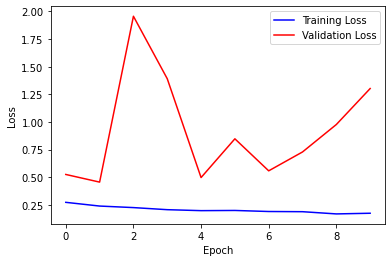

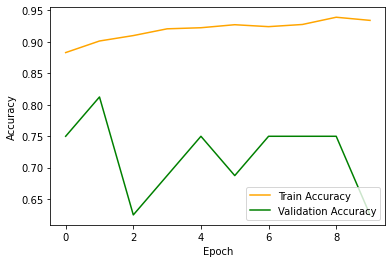

In [ ]:
import matplotlib.pyplot as plt

plot1 = plt.figure(1)
plt.plot(history.history['loss'], color='blue', label='Training Loss')
plt.plot(history.history['val_loss'], color='red', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plot2 = plt.figure(2)
plt.plot(history.history['acc'], color='orange', label='Train Accuracy')
plt.plot(history.history['val_acc'], color='green', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
custom_model.save('custom_model.h5')

<h1>Transfer Learning using InceptionV3</h1>


In [1]:
import os

total_images_normal = len(os.listdir('/content/chest_xray/train/NORMAL'))
total_images_pneumonia = len(os.listdir('/content/chest_xray/train/PNEUMONIA'))


print(f'Normal Images: {total_images_normal}', f'Pneumonia Images: {total_images_pneumonia}', sep = '\n')

Normal Images: 1341
Pneumonia Images: 3875


In [2]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import tqdm


import imgaug as agg
import imgaug.augmenters as iaa


base_dir = "chest_xray/"

# Image Augumentations in which one will be selected randomly

seq = iaa.OneOf([
    iaa.Fliplr(), # horizontal flips
    iaa.Affine(rotate=20), # rotation
    iaa.Multiply((1.2, 1.5))]) # brightness 


def loadData(split):
  data_dir = base_dir + split

  images, labels = [], []

  for label in os.listdir(data_dir):
    curr_dir = data_dir + f'/{label}/'
    print(label, data_dir)
    for img_file in os.listdir(curr_dir):
      img = cv2.imread(curr_dir + img_file)
      img = cv2.resize(img, (224, 224))
      

      img = img.astype(np.float32) / 255.
      images.append(img)
      labels.append(0 if label == 'NORMAL' else 1)
      
      # Oversample NORMAL class images since they are less in number
      # if split == 'train' and label == 'NORMAL':
      #   aug_img1 = seq.augment_image(img)
      #   aug_img2 = seq.augment_image(img)
      #   aug_img1 = cv2.cvtColor(aug_img1, cv2.COLOR_BGR2RGB)
      #   aug_img2 = cv2.cvtColor(aug_img2, cv2.COLOR_BGR2RGB)
      #   aug_img1 = aug_img1.astype(np.float32) / 255.
      #   aug_img2 = aug_img2.astype(np.float32) / 255.
      #   images.append(aug_img1)
      #   labels.append(0)
      #   images.append(aug_img2)
      #   labels.append(0)
      # else:
      #   img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      #   img = img.astype(np.float32) / 255.
      #   images.append(img)
      #   labels.append(0 if label == 'NORMAL' else 1)
    print(f'{label} done!')

  return np.asarray(images), np.asarray(labels)




In [3]:
X_train, y_train = loadData("train")

NORMAL chest_xray/train
NORMAL done!
PNEUMONIA chest_xray/train
PNEUMONIA done!


In [4]:
print(f'Number of Training Images: {X_train.shape[0]}')

Number of Training Images: 5216


In [8]:
X_test, y_test = loadData("test")
print(f'Number of Test Images: {X_test.shape[0]}')

NORMAL chest_xray/test
NORMAL done!
PNEUMONIA chest_xray/test
PNEUMONIA done!
Number of Test Images: 624


In [5]:
X_val, y_val = loadData("val")
print(f'Number of Validation Images: {X_val.shape[0]}')

NORMAL chest_xray/val
NORMAL done!
PNEUMONIA chest_xray/val
PNEUMONIA done!
Number of Validation Images: 16


In [6]:
# Convert labels to categorical vectors or one-hot encoded vectors

# from keras.utils.np_utils import to_categorical

# y_train = to_categorical(y_train, 2)
# y_test = to_categorical(y_test, 2)
# y_val = to_categorical(y_val, 2)


In [9]:
print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(5216, 224, 224, 3) (624, 224, 224, 3) (16, 224, 224, 3)
(5216,) (624,) (16,)


In [10]:
import tensorflow as tf
from keras.layers import Dense, GlobalAveragePooling2D, MaxPool2D, Activation, Dropout, BatchNormalization
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model

inception_base = InceptionV3(include_top = False, weights="imagenet")

In [11]:
# Freeze the layers of inception model since it has huge number of parameters
# for layer in inception_base.layers:
  # layer.trainable = False

In [12]:
inception_output = inception_base.output
out = GlobalAveragePooling2D()(inception_output)
out = Dense(1024, activation = "relu", name = 'fc1')(out)
out = Dropout(0.5)(out)
out = Dense(512, activation = "relu", name = 'fc2')(out)
out = Dropout(0.5)(out)
out = Dense(1, activation = "sigmoid", name = 'fc3')(out)

model = Model(inputs = [inception_base.input], outputs = [out])

In [ ]:
model.summary()

In [14]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [15]:
# callbacks = [ tf.keras.callbacks.ModelCheckpoint(filepath='best_model_inception.h5', monitor='val_loss', save_best_only = True)]


history = model.fit(X_train, y_train, batch_size = 64, epochs = 3, validation_data=(X_val, y_val))

Epoch 1/3
82/82 [==============================] - 56s 492ms/step - loss: 0.2626 - accuracy: 0.8957 - val_loss: 44.1003 - val_accuracy: 0.5000
Epoch 2/3
82/82 [==============================] - 38s 465ms/step - loss: 0.0529 - accuracy: 0.9811 - val_loss: 0.1056 - val_accuracy: 0.9375
Epoch 3/3
82/82 [==============================] - 37s 455ms/step - loss: 0.0405 - accuracy: 0.9875 - val_loss: 8.7019e-05 - val_accuracy: 1.0000


In [ ]:
history = model.fit(X_train, y_train, batch_size = 64, epochs = 1, validation_data=(X_val, y_val))

82/82 [==============================] - 38s 467ms/step - loss: 0.0418 - accuracy: 0.9850 - val_loss: 26.3586 - val_accuracy: 0.6875


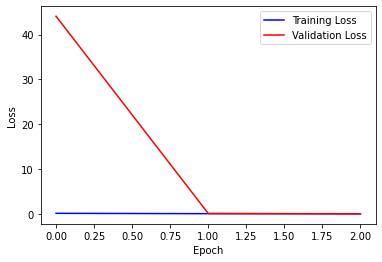

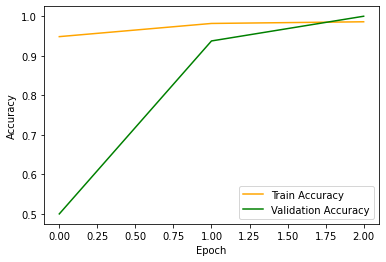

In [17]:
plot1 = plt.figure(1)
plt.plot(history.history['loss'], color='blue', label='Training Loss')
plt.plot(history.history['val_loss'], color='red', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plot2 = plt.figure(2)
plt.plot(history.history['accuracy'], color='orange', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color='green', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

1


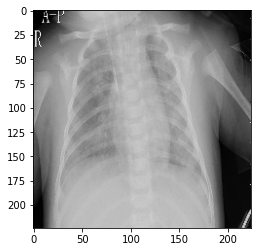

In [16]:
plt.imshow(X_val[-1])
print(y_val[-1])

In [16]:
loss, acc = model.evaluate(X_test, y_test)

20/20 [==============================] - 1s 71ms/step - loss: 2.3105 - accuracy: 0.8798


In [19]:
model.save("inception_without_aug.h5")